<a href="https://colab.research.google.com/github/EveTLynn/Packt-Data-Analysis-Workshop/blob/main/C1_Bike_Sharing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and read the dataset

In [1]:
!pip install wget
import wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=6a212c24f1adec6cba97a6bae54461902b30386e8ab4e5080f3294f6e0d2dc33
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
url = "https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip"
wget.download(url)

'bike+sharing+dataset.zip'

In [3]:
!unzip {"/content/bike+sharing+dataset.zip"} -d {"/content"}

Archive:  /content/bike+sharing+dataset.zip
  inflating: /content/Readme.txt     
  inflating: /content/day.csv        
  inflating: /content/hour.csv       


In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df_day = pd.read_csv("/content/day.csv")
df_hour = pd.read_csv("/content/hour.csv")

# Exploratory Data Analysis

In [6]:
print(df_day.head(3))
df_day.info()

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   

    cnt  
0   985  
1   801  
2  1349  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  

In [7]:
print(df_hour.head(3))
df_hour.info()

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5 

Both datasets don't have any nulls

In [8]:
# Desciptive statitstics
df_day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [9]:
df_hour.describe().T

count         mean          std   min        25%        50%  \
instant     17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
season      17379.0     2.501640     1.106918  1.00     2.0000     3.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   
casual      17379.0    35.676218    49.305030  0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286  0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599  1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
season          3.0000      4.0000  
yr              1.0000      1.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
weekday         5.0000      6.0000  
workingday      1.0000      1.0000  
weathersit      2.0000      4.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum             0.7800      1.0000  
windspeed       0.2537      0.8507  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

# Data Preprocessing

According to the description of the original data, provided in the Readme.txt file, we can split the columns into three main groups:

- temporal features: This contains information about the time at which the
record was registered. This group contains the dteday, season, yr, mnth, hr,
holiday, weekday, and workingday columns.
- weather related features: This contains information about the weather
conditions. The weathersit, temp, atemp, hum, and windspeed columns
are included in this group.
- record related features: This contains information about the number
of records for the specific hour and date. This group includes the casual,
registered, and cnt columns.

## Temporal features

The seasons column contains values from 1 to
4, which encode, respectively, the Winter, Spring, Summer, and Fall seasons.
The yr column contains the values 0 and 1 representing 2011 and 2012, while the
weekday column contains values from 0 to 6, with each one representing a day
of the week (0: Sunday, 1: Monday, through to 6: Saturday).

In [10]:
# create a copy of the original dataset
preprocessed_data = df_hour.copy()

In [11]:
#  transform seasons
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

In [12]:
# transform yr
yr_mapping = {0: 2011, 1:2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])

In [13]:
# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])

## Weather related features

According to the information provided by the data, the weathersit column represents the current weather conditions, where 1 stands for clear weather with a few clouds, 2 represents cloudy weather, 3 relates to light snow or rain, and 4 stands for heavy snow or rain.

The hum column stands for the current normalized air humidity, with values from 0 to 1 (hence, we will multiply the values of this column by 100, in order to obtain percentages).

Finally, the windspeed column represents the windspeed, which is again normalized to values between 0 and 67 m/s

In [14]:
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x])

In [15]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']*67

In [16]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

season    yr    weekday       weathersit   hum  windspeed
5792   summer  2011   Saturday            clear  74.0     8.9981
7823     fall  2011     Sunday            clear  43.0    31.0009
15426    fall  2012    Tuesday           cloudy  77.0     6.0032
15028    fall  2012     Sunday            clear  51.0    22.0028
12290  spring  2012     Friday           cloudy  89.0    12.9980
3262   spring  2011     Friday            clear  64.0     7.0015
10763  spring  2012   Thursday            clear  42.0    23.9994
12384  spring  2012    Tuesday  light_rain_snow  82.0    11.0014
6051   summer  2011  Wednesday            clear  52.0    19.0012
948    winter  2011   Saturday            clear  80.0     0.0000

## Registered vs Casual use analysis

In [17]:
"""
assert that total number of rides is equal to the sum of registered and
casual ones.
The error will occur if the condition weren't meet which mean the statemant is true.
.all() is a method that is called on the condition to check
if the condition is true for all rows in the DataFrame.
"""
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), \
'Sum of casual and registered rides not equal to total number of rides'

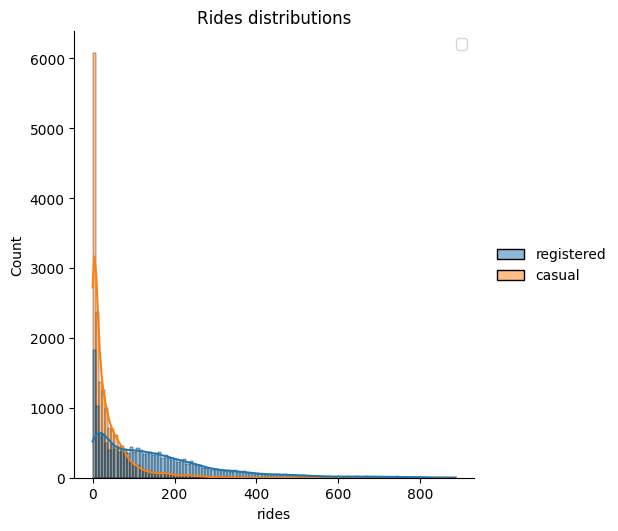

In [18]:
# plot distributions of registered vs casual rides
sns.displot(preprocessed_data[['registered', 'casual']], kde='True')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
plt.show()

that registered users perform way more rides than casual ones.
Furthermore, we can see that the two distributions are skewed to the
right, meaning that, for most of the entries in the data, zero or a small number of rides were recorded.

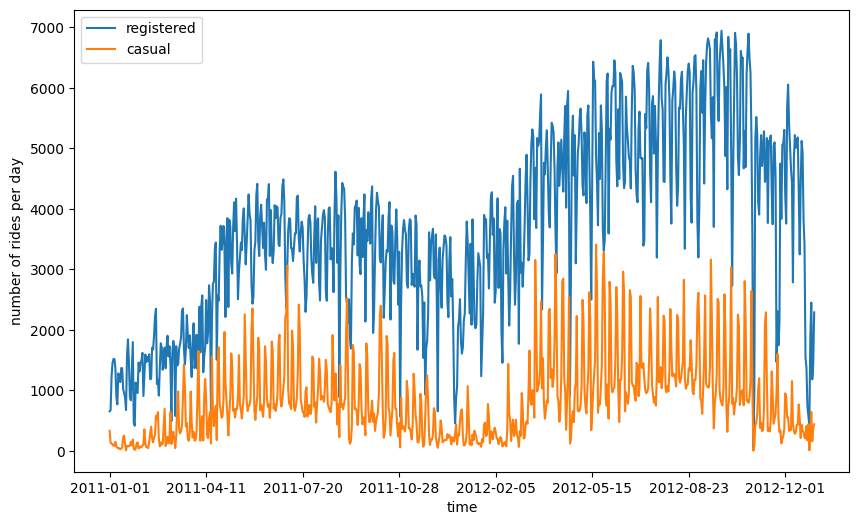

In [19]:
# plot evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

The number of registered rides is always above and significantly higher than the number of casual rides per day. Furthermore,
we can observe that during winter, the overall number of rides decreases (which is totally in line with our expectations, as bad weather and low temperatures have a negative impact on ride sharing services)

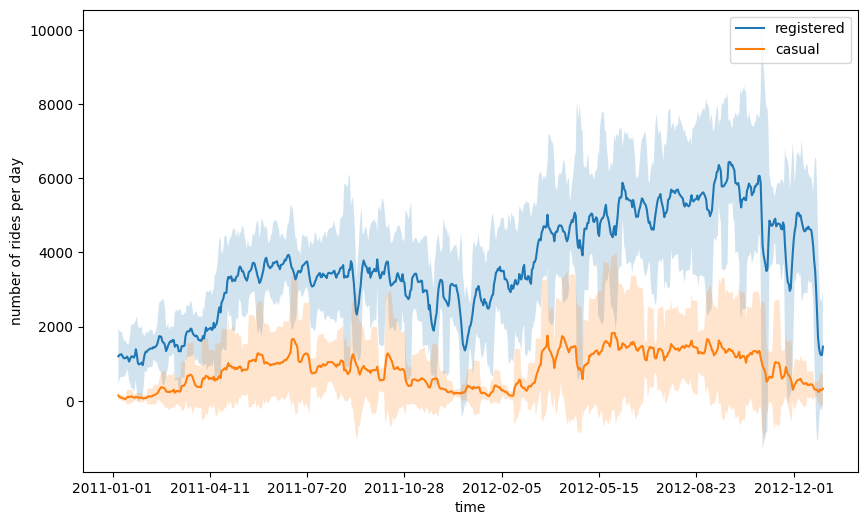

In [20]:
"""
Create new dataframe with necessary for plotting columns, and obtain
number of rides per day, by grouping over each day
"""
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()


"""
define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()


"""
Create a plot of the series, where we first plot the series of rolling
means, then we color the zone between the series of rolling means +- 2
rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] + 2*rolling_deviations['registered'],
                rolling_means['registered'] - 2*rolling_deviations['registered'], alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual'] + 2*rolling_deviations['casual'],
                rolling_means['casual'] - 2*rolling_deviations['casual'], alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

In order to compute the rolling statistics (that is, the mean and standard deviation), we use the rolling() function, in which we use mean() and std() to compute the rolling mean and standard deviation, respectively.

The value of the rolling mean (or the standard deviation) at a
certain time instance is only computed from the last window entries in the time series (in our case, this is 7), and not from the entries of the whole series

Let's now focus on the distributions of the requests over separate hours and days of the week. We would expect certain time patterns to arise, as bike requests should be more frequent during certain hours of the day, depending on the day of the week.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


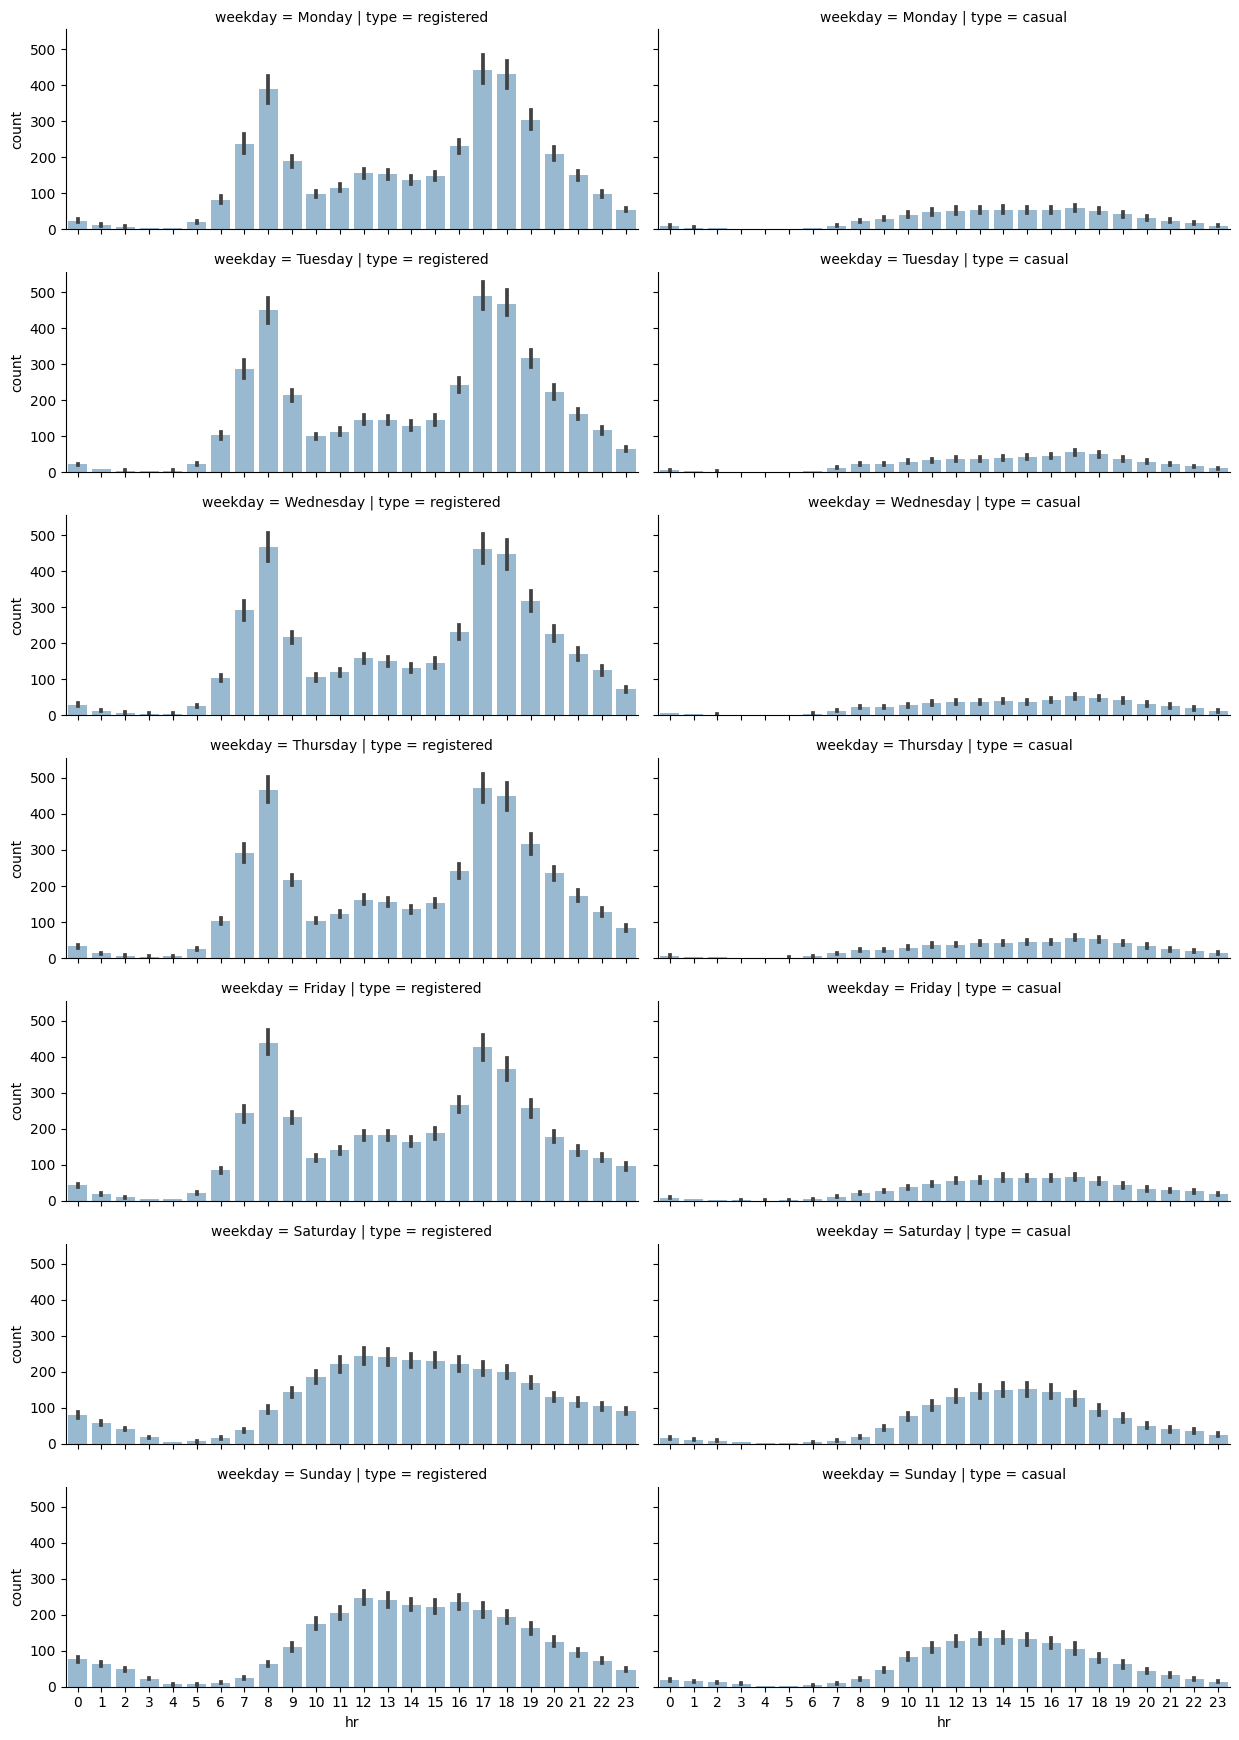

In [21]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]

# transform the data into a format, in number of entries are computed as count,
# for each distinct hr, weekday and type (registered or casual)
"""
the melt() function, applied on a pandas dataset. It will create a new
dataset, in which values are grouped by the hr and weekday columns, while creating
two new columns: type (containing the casual and registered values) and
count (containing the respective counts for the casual and registered types).
"""
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')

# create FacetGrid object, in which a grid plot is produced.
# As columns, we have the various days of the week,
# as rows, the different types (registered and casual)
grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5,
                     aspect=2.5,  # aspect will change the width while keeping the height constant.
                     row_order=['Monday', 'Tuesday','Wednesday',
                                'Thursday', 'Friday', 'Saturday', 'Sunday'])


# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

In [22]:
# Pandas.melt() unpivots a DataFrame from wide format to long format.
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]
plot_data.head()

hr   weekday  registered  casual
0   0  Saturday          13       3
1   1  Saturday          32       8
2   2  Saturday          27       5
3   3  Saturday          10       3
4   4  Saturday           1       0

In [23]:
"""
syntax: pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)
frame : DataFrame
id_vars[tuple, list, or ndarray, optional] : Column(s) to use as identifier variables.
value_vars[tuple, list, or ndarray, optional]: Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.
var_name[scalar]: Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.
value_name[scalar, default ‘value’]: Name to use for the ‘value’ column.
col_level[int or string, optional]: If columns are a MultiIndex then use this level to melt.
"""

plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')

hr   weekday        type  count
0       0  Saturday  registered     13
1       1  Saturday  registered     32
2       2  Saturday  registered     27
3       3  Saturday  registered     10
4       4  Saturday  registered      1
...    ..       ...         ...    ...
34753  19    Monday      casual     11
34754  20    Monday      casual      8
34755  21    Monday      casual      7
34756  22    Monday      casual     13
34757  23    Monday      casual     12

[34758 rows x 4 columns]

## Analyze seasonal impact on rides

Creat a grid plot that shows the number of rides will be distributed over hours and weekdays, based on the
current season

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


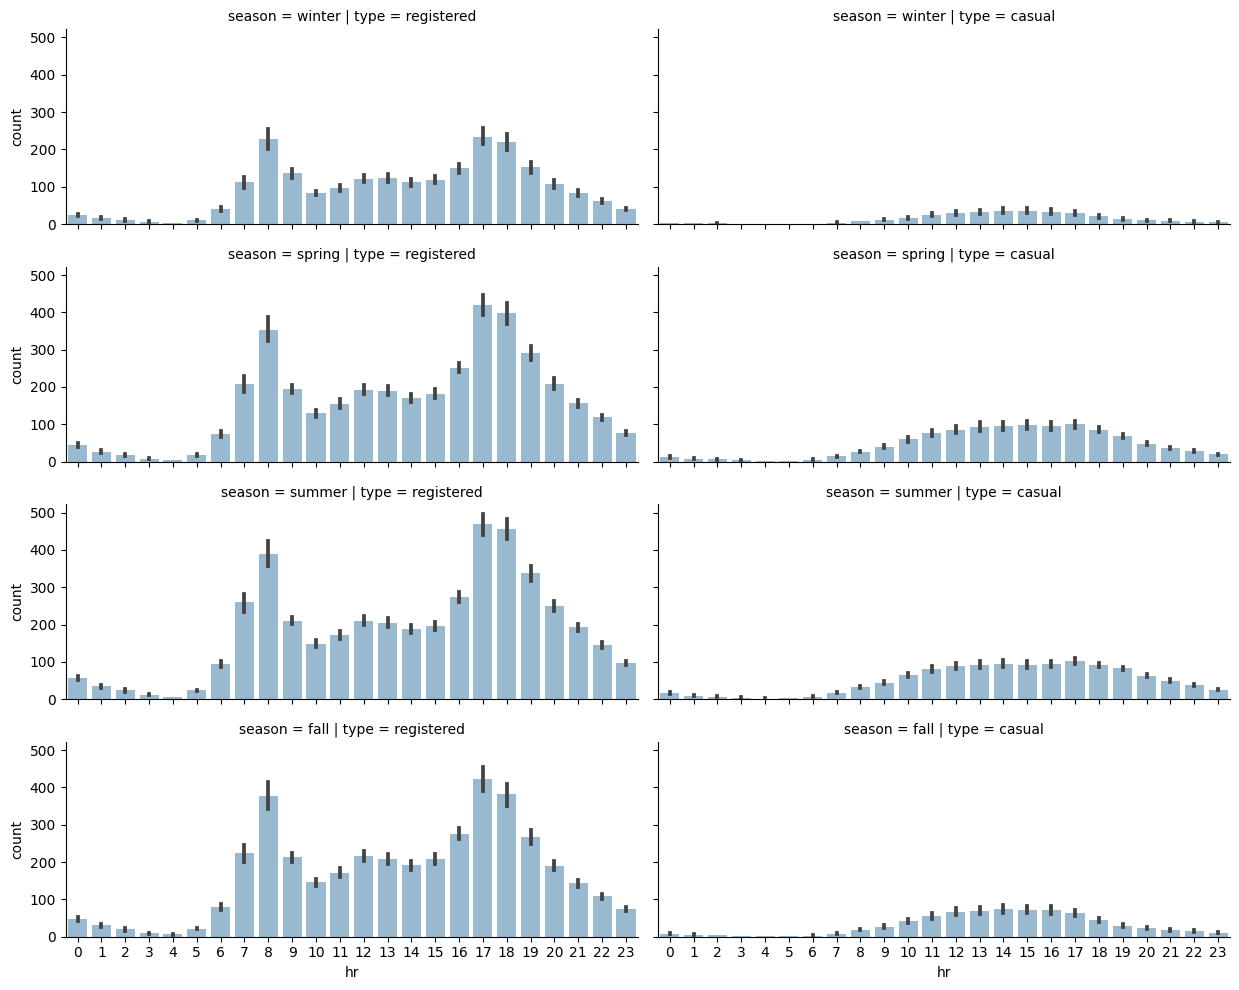

In [24]:
# By hours
# select relevant columns
plot_data = preprocessed_data[['hr', 'season', 'registered', 'casual']]

plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5,
                     aspect=2.5,  # aspect will change the width while keeping the height constant.
                     row_order=['winter', 'spring', 'summer', 'fall'])


# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

As can be seen in the plot, while each season has a similar graph shape, the count is lower for the winter graph. So there are fewer rides (registered and casual) during winter. This makes sense, as fewer rides are likely to occur when the weather conditions are poor.

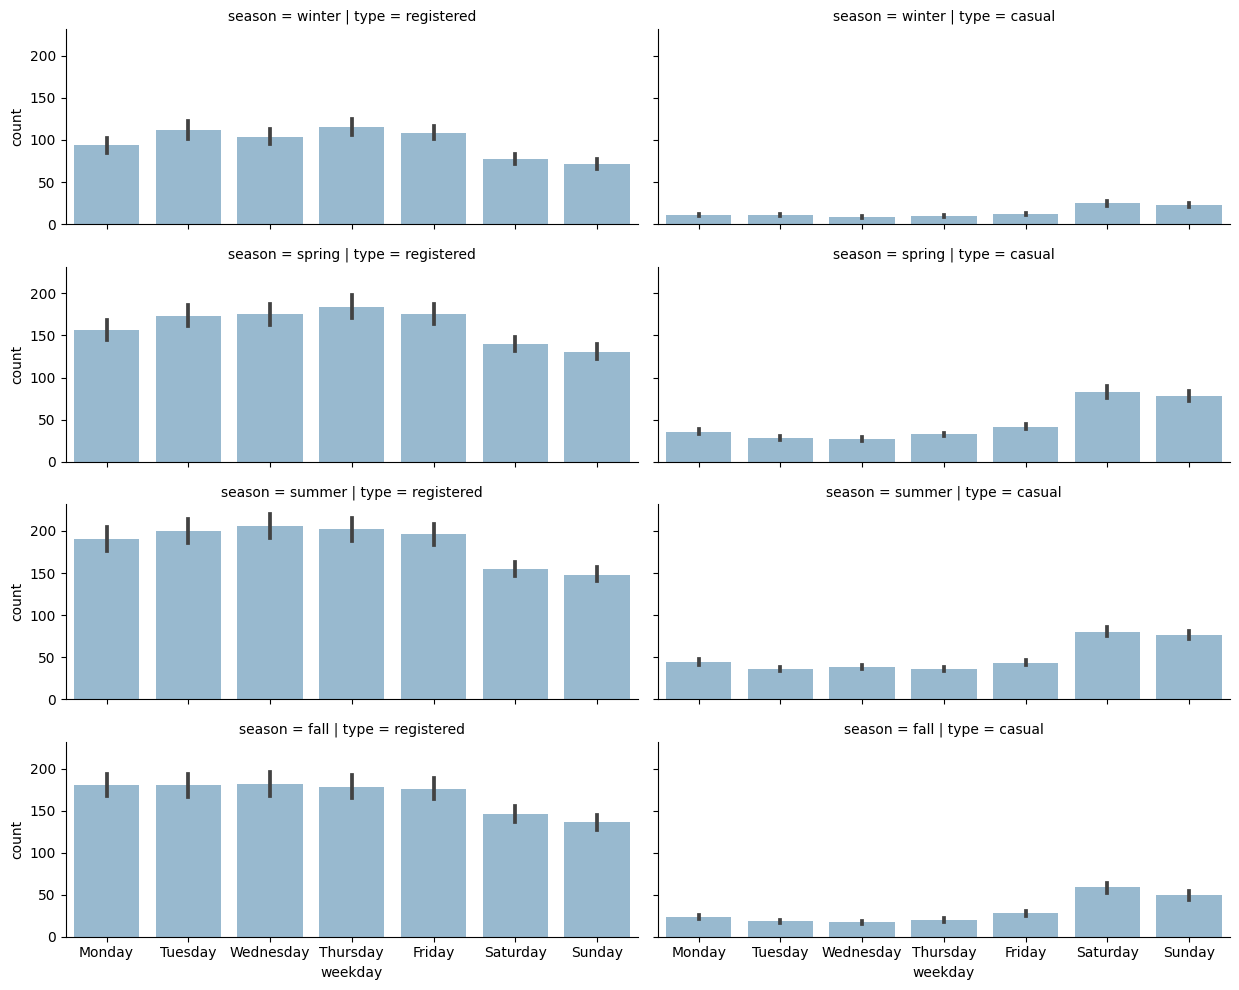

In [25]:
# By weekdays
# select relevant columns
plot_data = preprocessed_data[['weekday', 'season', 'registered', 'casual']]

plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5,
                     aspect=2.5,  # aspect will change the width while keeping the height constant.
                     row_order=['winter', 'spring', 'summer', 'fall'])


# populate the FacetGrid with the bar plots
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5,
         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

There is a decreasing number of registered rides over
the weekend (compared to the rest of the week), while the number of casual rides increases. This could enforce our initial hypothesis, that is, that registered customers mostly use the bike sharing service for commuting (which could be the reason for the decreasing number of registered rides over the weekend), while casual customers use the service occasionally over the weekend. Of course, such a conclusion cannot be based solely on plot observations but has to be backed by statistical tests.

# Hypothesis Testing

## Estimate average registered rides

Start with computing the average number of registered rides per hour. Note
that this value will serve in formulating the null hypothesis because, here, you
are explicitly computing the population statistic—that is, the average number
of rides. In most of the cases, such quantities are not directly observable and, in general, you only have an estimation for the population statistics

In [26]:
# compute population mean of registered rides per hour
population_mean = preprocessed_data.registered.mean()

In [27]:
# get sample of the data (summer 2011)
sample = preprocessed_data[(preprocessed_data.season == "summer") &\
                               (preprocessed_data.yr == 2011)].registered

In [28]:
# perform t-test and compute p-value
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]:.03f}, p-value: {test_result[1]:.03f}")

Test statistic: -3.492, p-value: 0.000


In [29]:
test_result

TtestResult(statistic=-3.4919691483786197, pvalue=0.0004887645279519505, df=2239)

The result of the previous test returns a p-value smaller than 0.001, which is less than the predefined critical value. Therefore, you can reject the null hypothesis and assume that the alternative hypothesis is correct (mean of the sample is different from the mean of the population).

You computed the average number of rides on the true population; therefore, the value computed by the statistical test should be the same. So why have you rejected the null hypothesis? The answer to that question lies in the fact that your sample is not a true representation of the population, but rather a biased one. In fact, you selected only entries from the summer of 2011. Therefore, neither data from the full year is present, nor entries from 2012.

In order to show how such mistakes can compromise the results of statistical
tests, perform the test again, but this time taking as a sample 5% of the
registered rides (selected randomly).

In [30]:
# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]:.03f}, p-value: {test_result_unbiased[1]:.03f}")

Unbiased test statistic: 0.292, p-value: 0.770


The p-value > 5%, can't reject the null hypothesis.

In [31]:
from scipy import stats
stats.percentileofscore(sample_unbiased, population_mean)

58.80322209436133

## Hypothesis testing on registered ride

First, formulate the null hypothesis. As mentioned earlier, you are interested
in identifying whether there is a statistically significant difference between
registered rides during working days and the weekend. Therefore, our null
hypothesis is that the average number of rides for registered users during
working days is the same as the average number of rides during the weekend. In
other words:

H_0 : average registered rides over weekdays-average registered rides over
weekend=0

H_a : average registered rides over weekdays-average registered rides over
weekend≠0

In [32]:
# collect the data for each group
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)

# select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

In [33]:
weekend_mask.dtype

dtype('bool')

In [34]:
# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: -16.004, p-value: 0.000


In [35]:
type(weekend_data)

pandas.core.series.Series

The resulting p-value from this test is less than 0.0001, which is far below the
standard critical 0.05 value. As a conclusion, we can reject the null hypothesis
and confirm that our initial observation is correct: that is, there is a statistically significant difference between the number of rides performed during working days and the weekend.

<ipython-input-36-0fd6892436a7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weekend_data, label='weekend days')
<ipython-input-36-0fd6892436a7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(workingdays_data, label='working days')


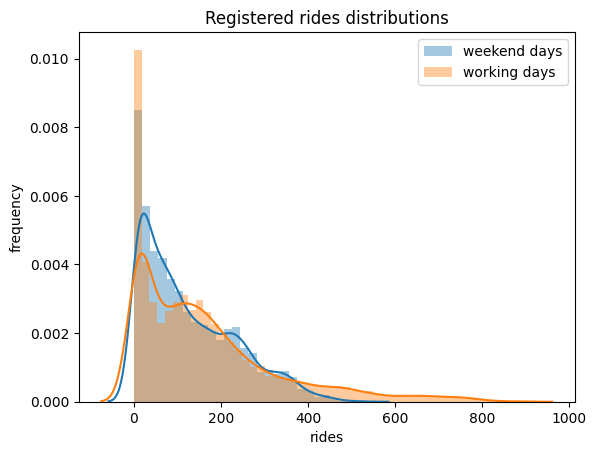

In [36]:
"""
plot distributions of registered rides for working vs weekend days
"""
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")
plt.show()

Perform the same type of hypothesis testing to validate the second assumption
from the last section— that is, casual users perform more rides during the
weekend. In this case, the null hypothesis is that the average number of rides
during working days is the same as the average number of rides during the
weekend, both performed only by casual customers. The alternative hypothesis
will then result in a statistically significant difference in the average number of rides between the two groups:

In [37]:
# collect the data for each group
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)

# select registered rides for the weekend and working days
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]

In [38]:
# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: 41.077, p-value: 0.000


The p-value returned from the previous code snippet is 0, which is strong
evidence against the null hypothesis. Hence, we can conclude that casual
customers also behave differently over the weekend (in this case, they tend to
use the bike sharing service more)

<ipython-input-39-698194ab1b7f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weekend_data, label='weekend days')
<ipython-input-39-698194ab1b7f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(workingdays_data, label='working days')


Text(0.5, 1.0, 'Casual rides distributions')

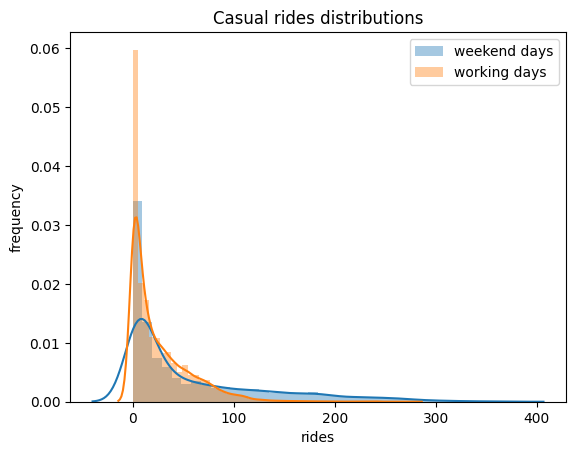

In [39]:
# plot distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")

In conclusion, we can say that there is a statistically significant difference between the number of rides on working days and weekend days for both casual and
registered customers.

# Analysis of weather related features

In [40]:
def plot_correlations(data, col):
    # get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, scatter_kws={"alpha":0.05},
                     label=f"Registered rides (correlation: {corr_r:.3f})")

    # get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, scatter_kws={"alpha":0.05},
                    label=f"Casual rides (correlation: {corr_c:.3f})")

    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)

    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {col}")
    return ax

<ipython-input-40-ecf8a24481e7>:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


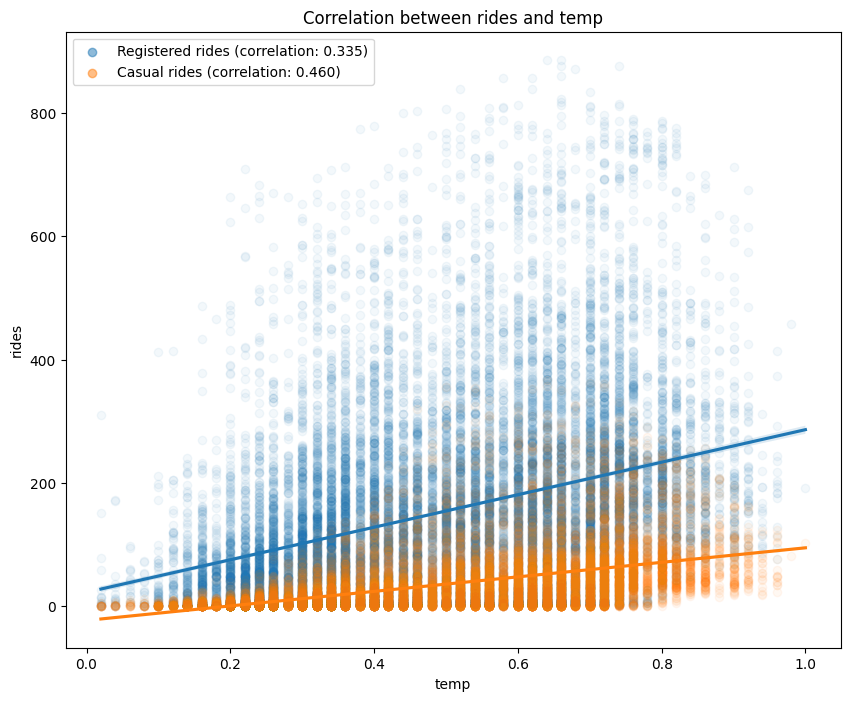

In [41]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')

<ipython-input-40-ecf8a24481e7>:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


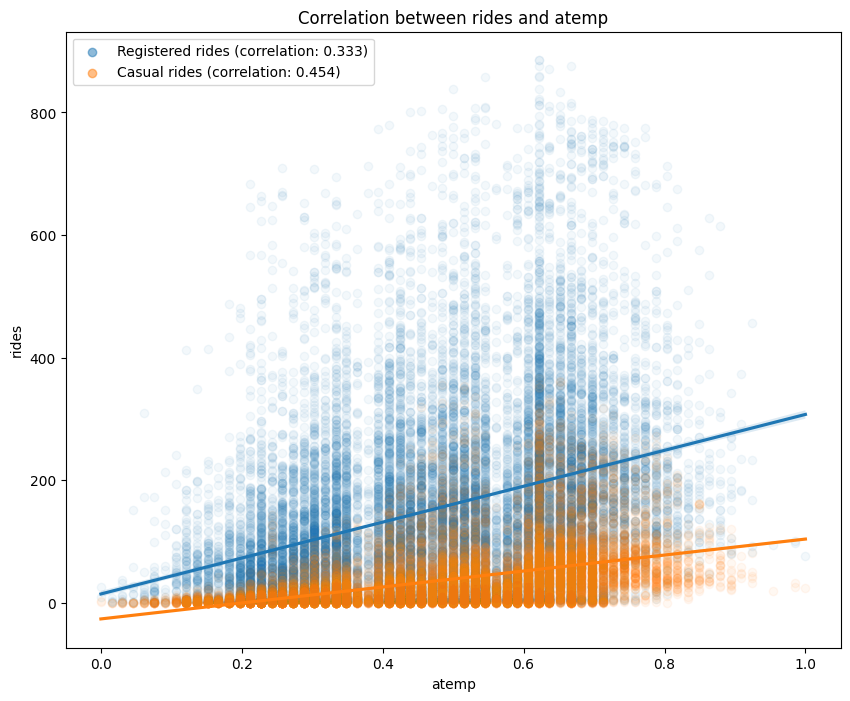

In [42]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')

<ipython-input-40-ecf8a24481e7>:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


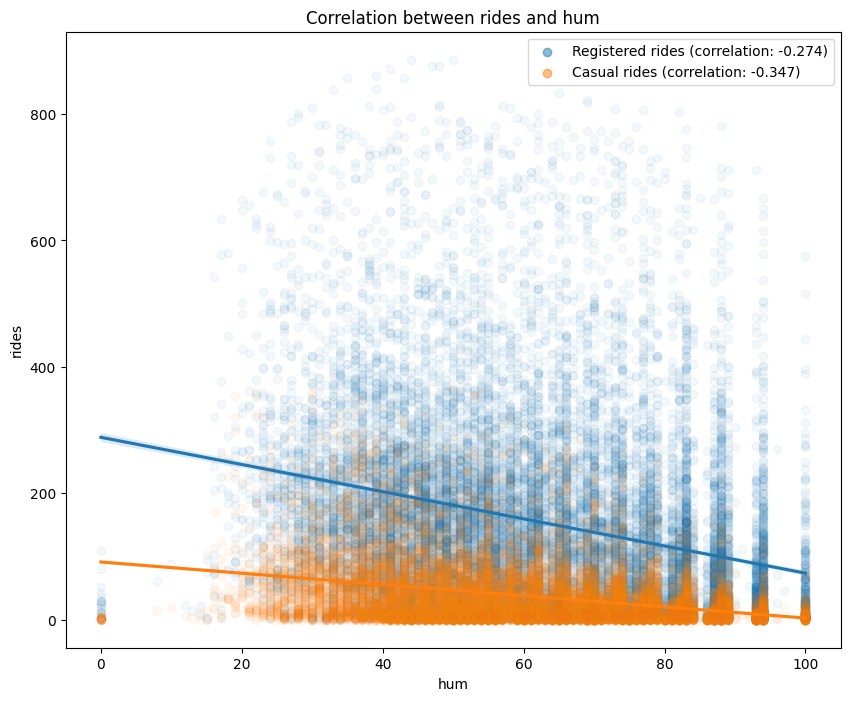

In [43]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')

<ipython-input-40-ecf8a24481e7>:14: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


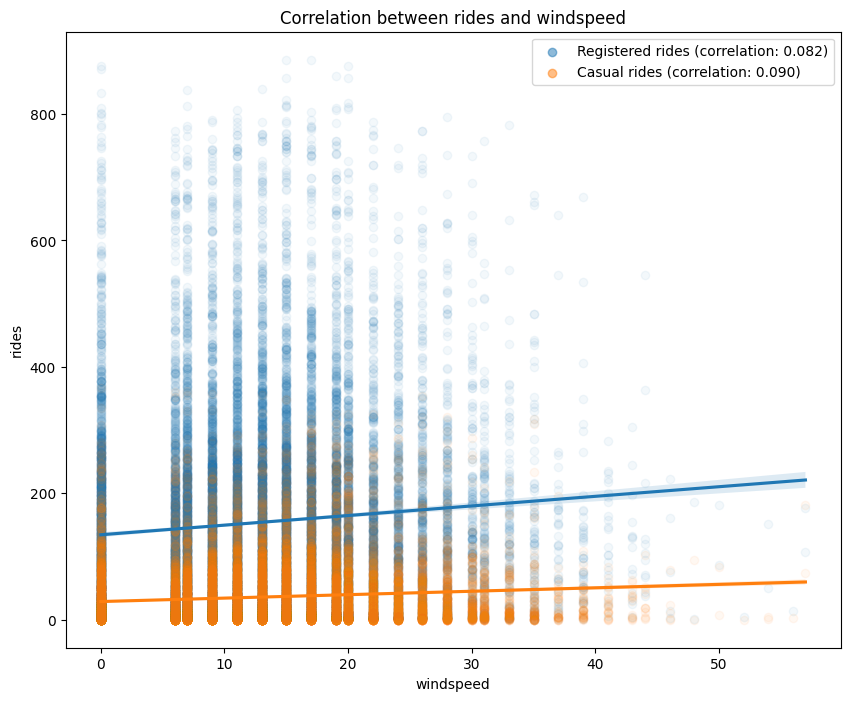

In [44]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')

We can observe that higher temperatures have a positive impact on the number of rides (the correlation between registered/casual rides and temp is 0.335 and 0.46, respectively, and it's a similar case for atemp). Note that as the values in the registered column are widely spread with respect to the different values in temp, we have a lower correlation compared to the casual column.

The humidity level has a negative correlation with both types of rides (-0.274 for registered and -0.347 for casual). This means that with a high level of humidity (mist or rain), customers will tend not to use the bike sharing service.

We can also see that there is minimal correlation between the number of rides and the wind speed (a weak positive correlation).

One of the major drawbacks of the correlation coefficient is its assumption of a linear relationship between the two random variables. This is quite a strong assumption as, most of the time, relationships in nature are not linear. A measure that generalizes the Pearson's correlation to monotonic relationships between two variables is the Spearman rank correlation.

## Evaluate the correlation between Spearman and Pearson correlation

Text(0.5, 1.0, 'Monotonic relationship\n Pearson: 0.856, Spearman: 1.000')

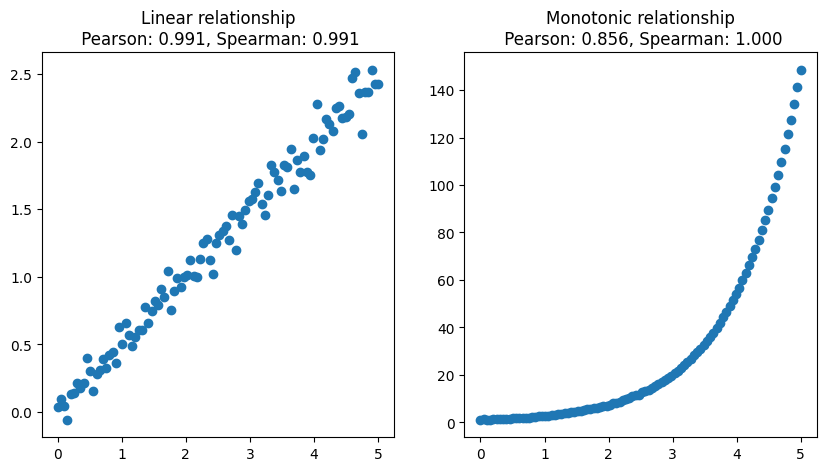

In [45]:
from scipy.stats import pearsonr, spearmanr

# define random variables
x = np.linspace(0,5, 100)
y_lin = 0.5*x + 0.1*np.random.randn(100)
y_mon = np.exp(x) + 0.1*np.random.randn(100)

# compute correlations
# return a two-dimensional array in which the first value is the respective correlation,
# whilethe second one is the p-value of a hypothesis test in which the null hypothesis
# assumes that the computed correlation is equal to zero.
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

# visualize variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(x, y_lin)
ax1.set_title(f"Linear relationship\n Pearson: {corr_lin_pearson:.3f}, Spearman: {corr_lin_spearman:.3f}")
ax2.scatter(x, y_mon)
ax2.set_title(f"Monotonic relationship\n Pearson: {corr_mon_pearson:.3f}, Spearman: {corr_mon_spearman:.3f}")

In [46]:
pearsonr(x, y_lin)

PearsonRResult(statistic=0.9912176957216098, pvalue=6.347559303794671e-88)

In [47]:
# define function for computing correlations
def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]

    return pd.Series({"Pearson (registered)": pearson_reg,
                      "Spearman (registered)": spearman_reg,
                      "Pearson (casual)": pearson_cas,
                      "Spearman (casual)": spearman_cas})

# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", "Spearman (registered)", "Pearson (casual)", "Spearman (casual)"])

for col in cols:
    corr_data[col] =  compute_correlations(preprocessed_data, col)

corr_data.T

Pearson (registered)  Spearman (registered)  Pearson (casual)  \
temp                   0.335361               0.373196          0.459616   
atemp                  0.332559               0.373014          0.454080   
hum                   -0.273933              -0.338480         -0.347028   
windspeed              0.082321               0.122936          0.090287   

           Spearman (casual)  
temp                0.570989  
atemp               0.570419  
hum                -0.388213  
windspeed           0.122920

As we can observe, for most of the variables, the Pearson and Spearman correlation coefficient are close enough (some non-linearity is to be expected). The most striking difference between the two coefficients occurs when comparing the temp (and atemp) and casual columns. More precisely, the Spearman correlation is quite high, meaning that there is significant evidence for a nonlinear, relatively strong and
positive relationship.

An interpretation of this result is that casual customers are far keener on using the bike sharing service when temperatures are higher. We have already seen from our previous analysis that casual customers ride mostly during the weekend, and they do not rely on bike sharing services for commuting to work. This conclusion is again confirmed by the strong relationship with temperature, as opposed to registered
customers, whose rides have a weaker correlation with temperature.

A useful technique when performing a comparison between different continuous features is the correlation matrix plot. It allows the analyst to quickly visualize any possible relationships between the different features and identify potential clusters with highly correlated features.

(5.5, -0.5)

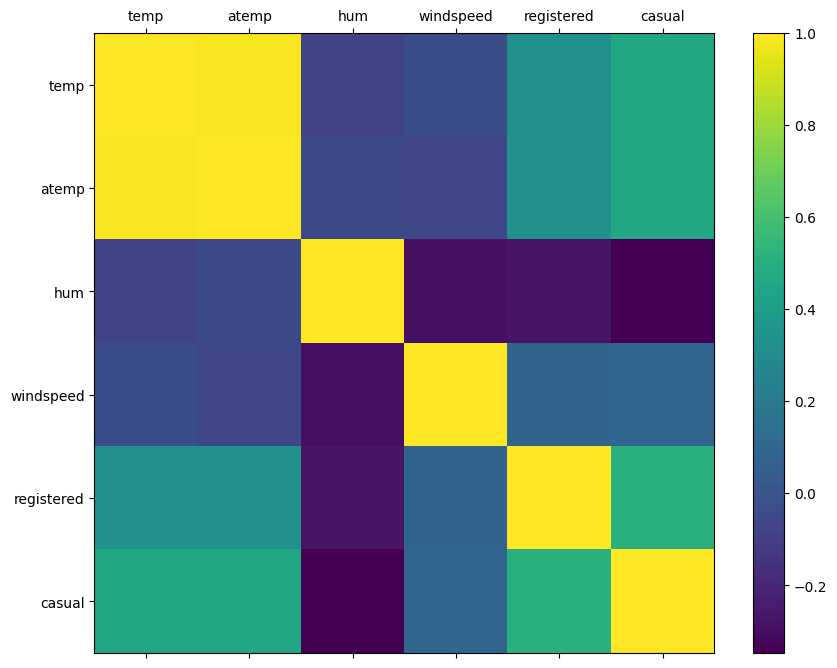

In [48]:
# plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", "registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()

fig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])

# Time Series Analysis

In [49]:
# get daily rides
daily_rides = preprocessed_data[["dteday", "registered", "casual"]]
daily_rides = daily_rides.groupby("dteday").sum()

# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

In [50]:
daily_rides.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   registered  731 non-null    int64
 1   casual      731 non-null    int64
dtypes: int64(2)
memory usage: 17.1 KB


In [51]:
# define function for plotting rolling statistics and ADF test for time series
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts, window=10, **kwargs):
    # create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    plot_data['rolling_std'] = ts.rolling(window).std()

    # compute p-value of Dickey-Fuller test (null hypo: non-stationary)
    p_val = adfuller(ts)[1]

    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")

<Figure size 640x480 with 0 Axes>

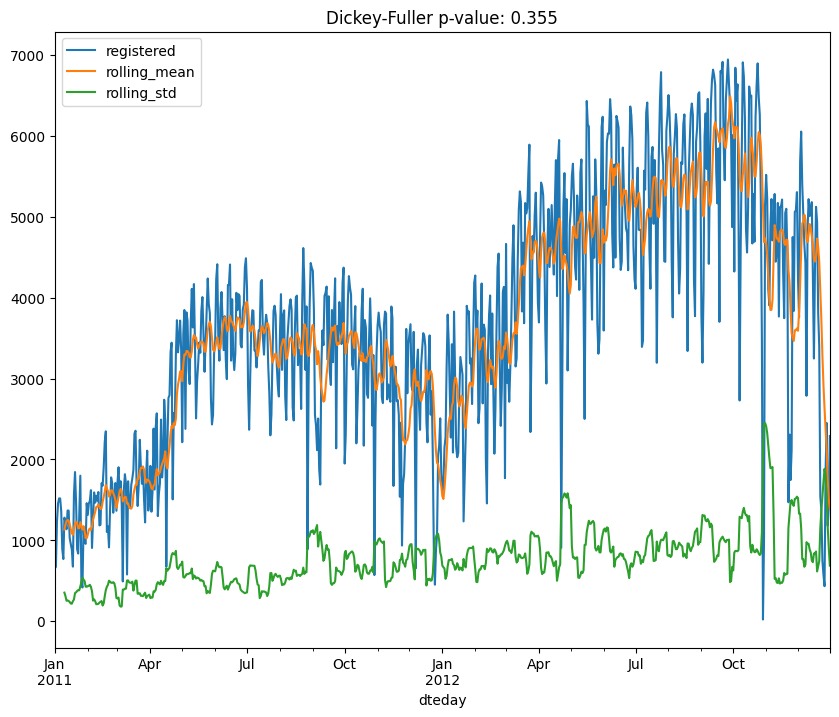

In [52]:
plt.figure()
test_stationarity(daily_rides["registered"], figsize=(10, 8))

<Figure size 640x480 with 0 Axes>

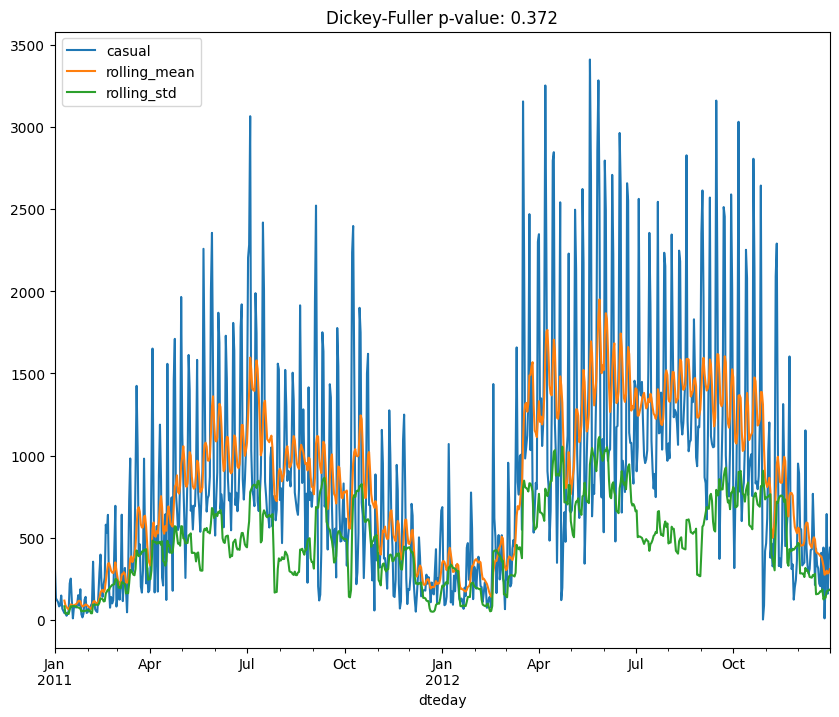

In [53]:
plt.figure()
test_stationarity(daily_rides["casual"], figsize=(10, 8))

From the performed tests, we can see that neither the moving average nor standard deviations are stationary. Furthermore, the Dickey-Fuller test returns values of 0.355 and 0.372 for the registered and casual columns, respectively. This is strong evidence that the time series is not stationary, and we need to process them in order to obtain a stationary one.

A common way to detrend a time series and make it stationary is to subtract either its rolling mean or its last value, or to decompose it into a component that will contain its trend, seasonality, and residual components. Let's first check whether the time series
is stationary by subtracting their rolling means and last values.

In [54]:
# make time series stationary
registered = daily_rides["registered"]
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)

<Figure size 640x480 with 0 Axes>

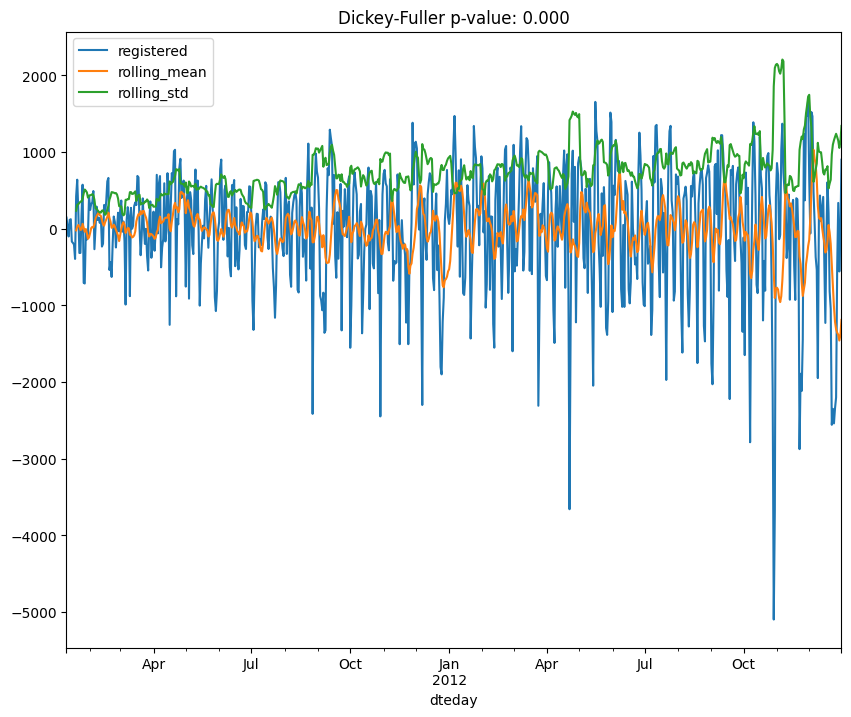

In [55]:
plt.figure()
test_stationarity(registered_ma_diff, figsize=(10, 8))

<Figure size 640x480 with 0 Axes>

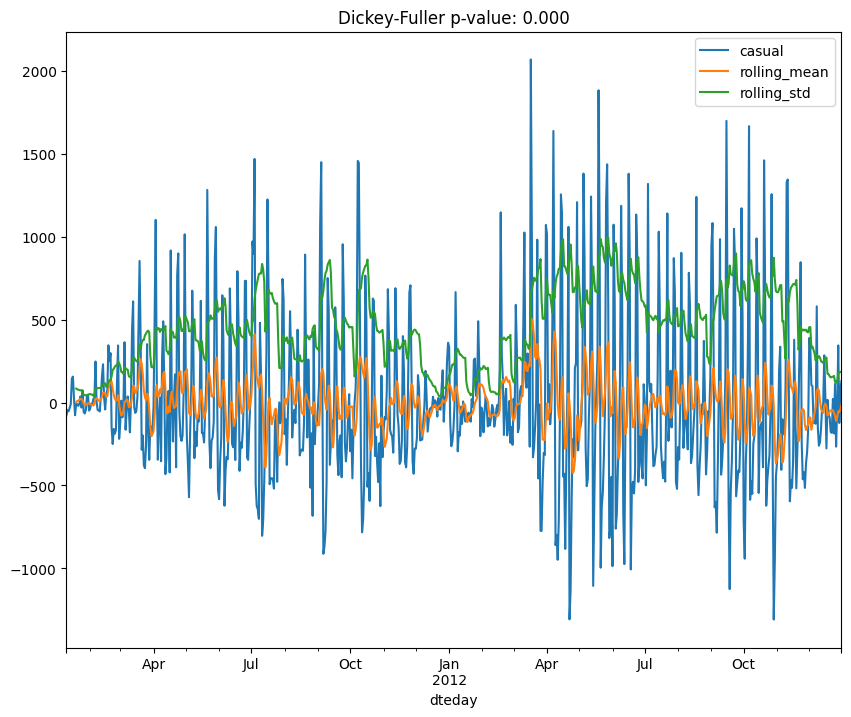

In [56]:
plt.figure()
test_stationarity(casual_ma_diff, figsize=(10, 8))

In [57]:
# subtract last value
registered = daily_rides["registered"]
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)

<Figure size 640x480 with 0 Axes>

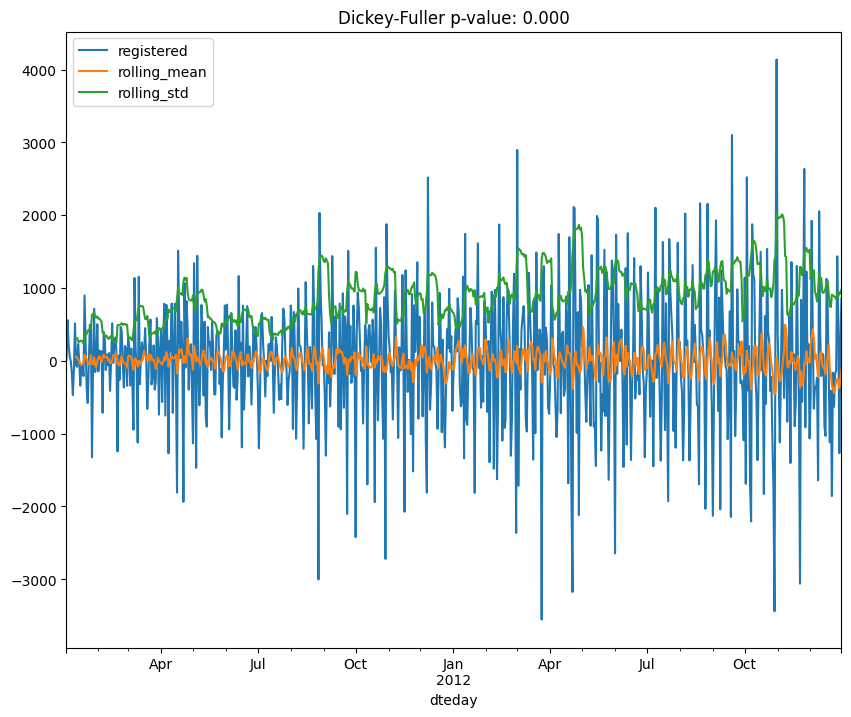

In [58]:
plt.figure()
test_stationarity(registered_diff, figsize=(10, 8))

<Figure size 640x480 with 0 Axes>

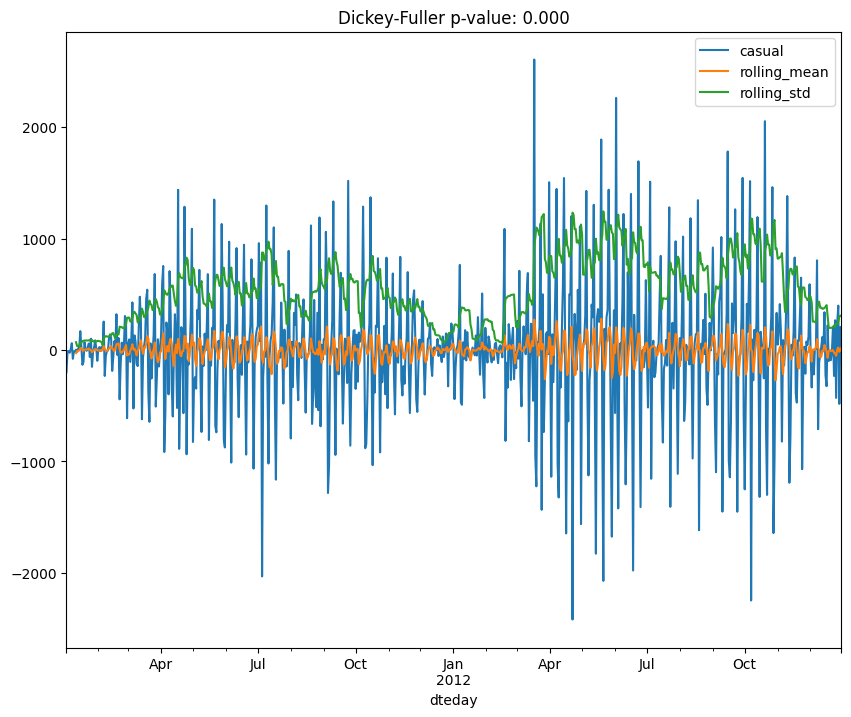

In [59]:
plt.figure()
test_stationarity(casual_diff, figsize=(10, 8))

As you can see, both of the techniques returned a time series, which is stationary, according to the Dickey-Fuller test. Note that an interesting pattern occurs in the casual series: a rolling standard deviation exhibits a clustering effect, that is, periods in which the standard deviation is higher and periods in which it is lower. This effect is quite common in certain fields (finance, for instance) and is known as volatility clustering. A possible interpretation, relative to our data, is that the number of casual rides increases during summer periods and drops during the winter.

## Time series decomposition in trend, seasonality and residuals

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

registered_decomposition = seasonal_decompose(daily_rides["registered"])
casual_decomposition = seasonal_decompose(daily_rides["casual"])

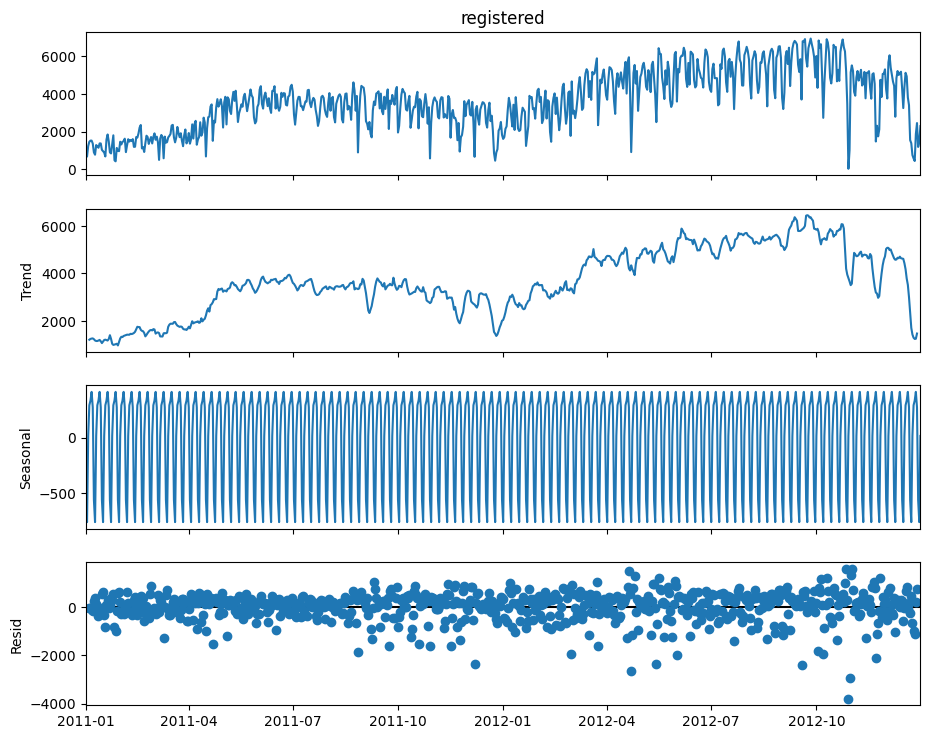

In [61]:
# plot decompositions
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10, 8)

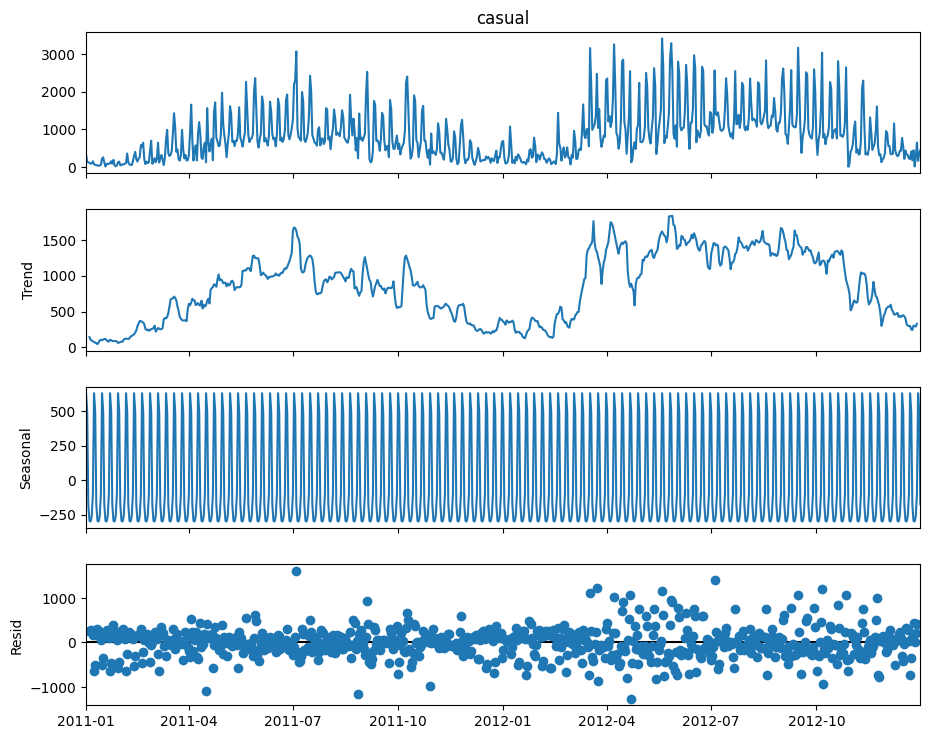

In [62]:
casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10, 8)

<Figure size 640x480 with 0 Axes>

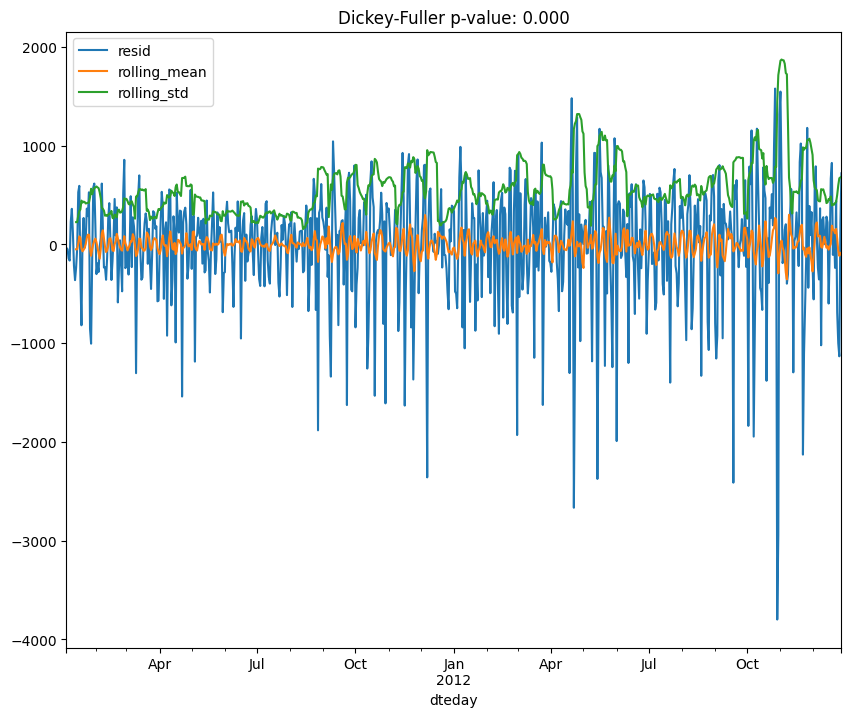

In [63]:
# test residuals for stationarity
plt.figure()
test_stationarity(registered_decomposition.resid.dropna(), figsize=(10, 8))

<Figure size 640x480 with 0 Axes>

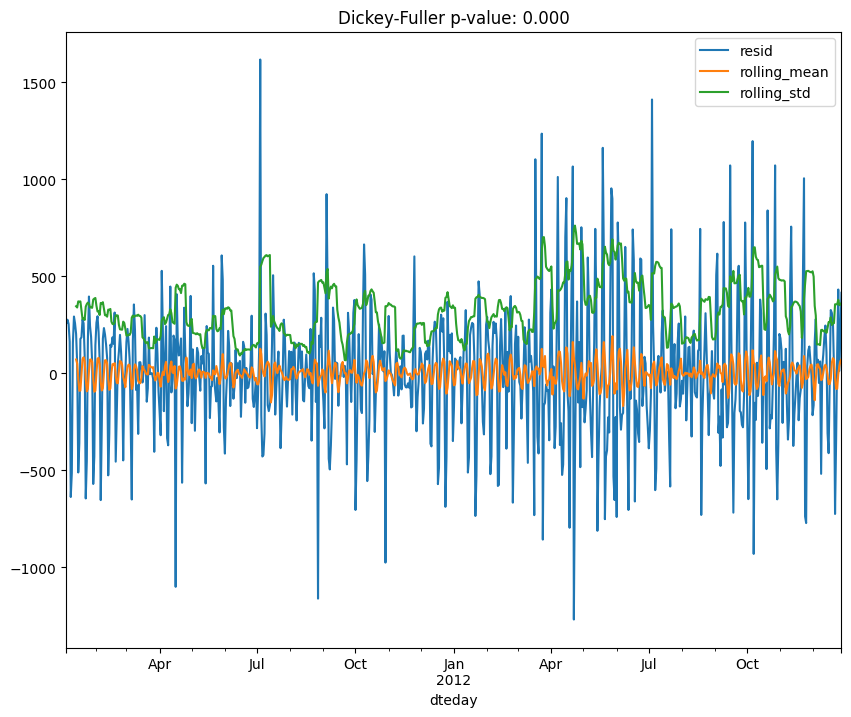

In [64]:
plt.figure()
test_stationarity(casual_decomposition.resid.dropna(), figsize=(10, 8))

## ARIMA Model

### ACF and PACF

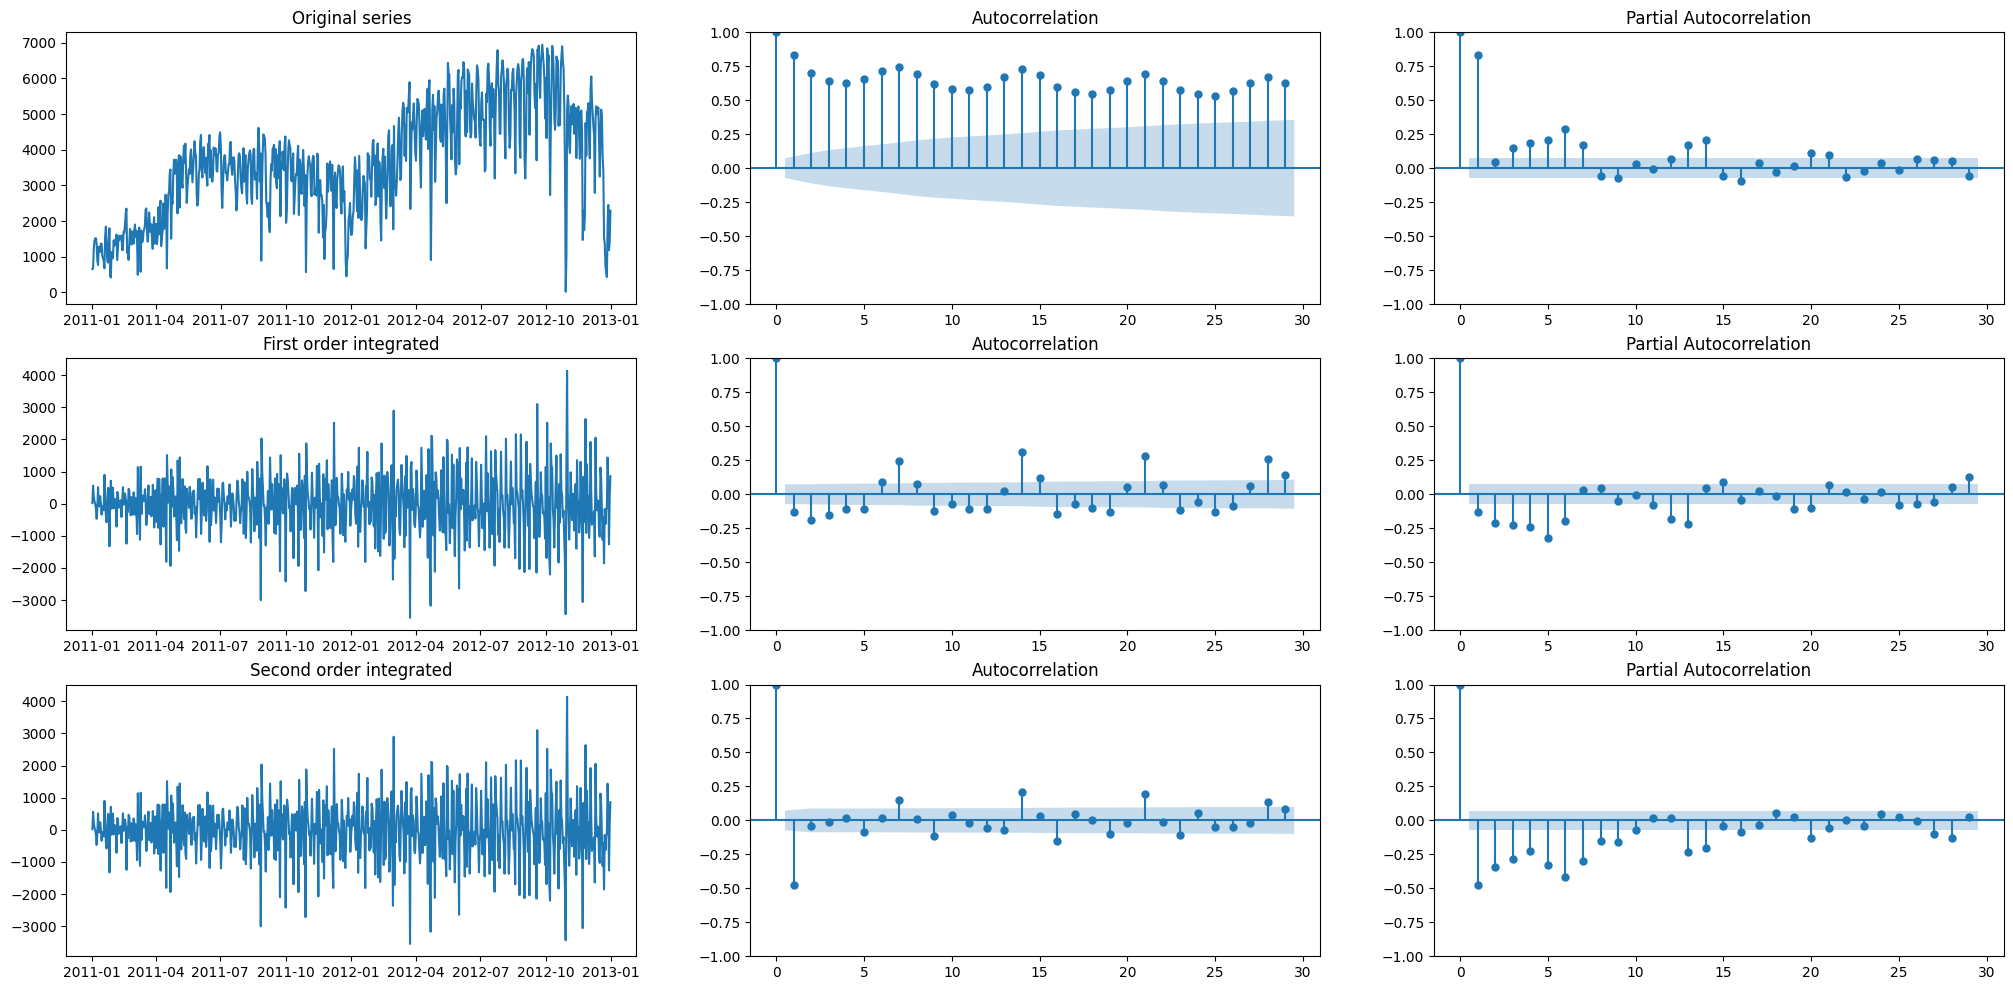

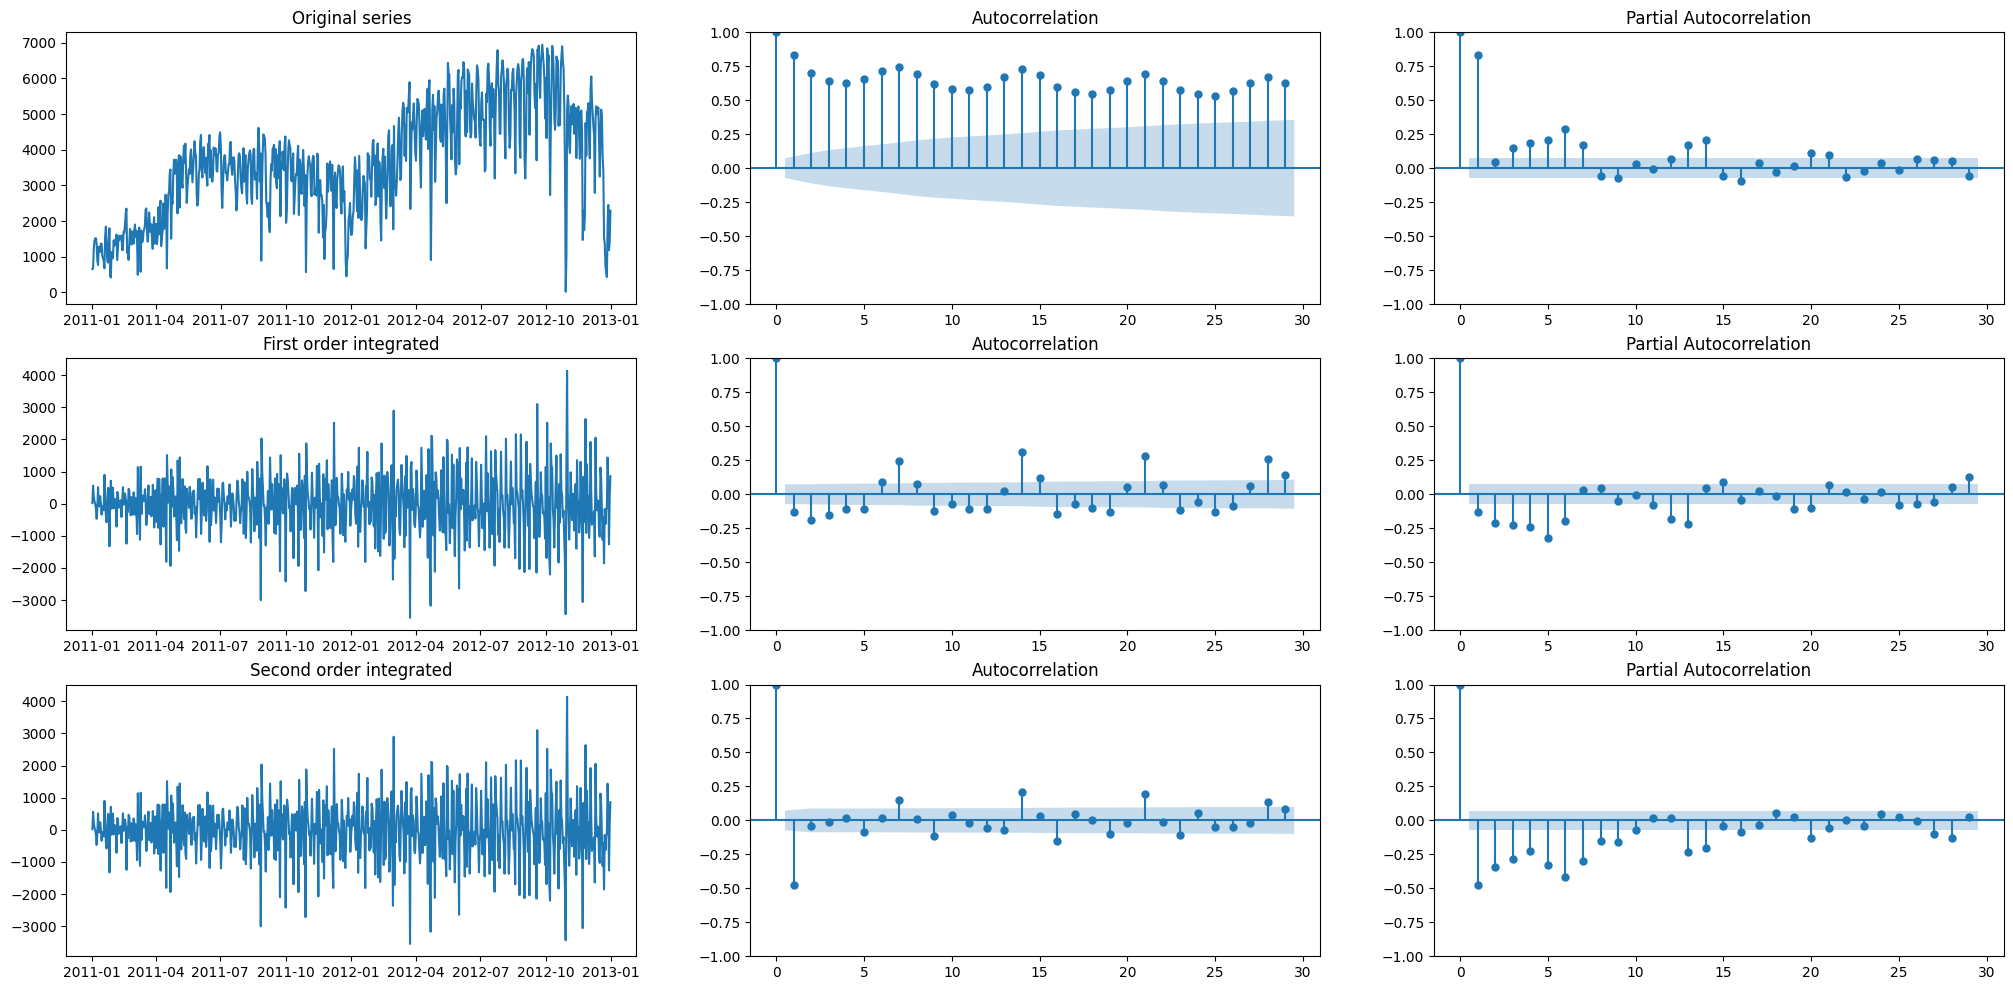

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(3, 3, figsize=(25, 12))

# plot original series
original = daily_rides["registered"]
axes[0,0].plot(original)
axes[0,0].set_title("Original series");
plot_acf(original, ax=axes[0,1])
plot_pacf(original, ax=axes[0,2])

# plot first order integrated series
first_order_int = original.diff().dropna()
axes[1,0].plot(first_order_int)
axes[1,0].set_title("First order integrated")
plot_acf(first_order_int, ax=axes[1,1])
plot_pacf(first_order_int, ax=axes[1,2])

# plot first order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2,0].plot(first_order_int)
axes[2,0].set_title("Second order integrated");
plot_acf(second_order_int, ax=axes[2,1])
plot_pacf(second_order_int, ax=axes[2,2])

The original series exhibits several autocorrelation coefficients that are above the threshold. The first order integrated series has only a few, which makes it a good candidate for further modeling (hence, selecting an ARIMA(p,1,q) model). Finally, the second order
integrated series present a large negative autocorrelation of lag 1, which, in general, is a sign of too large an order of integration.
Now focus on finding the model parameters and the coefficients for an
ARIMA(p,d,q) model, based on the observed registered rides.

In [66]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.8 MB/s eta 0:00:00


Python's pmdarima package has a special function that automatically finds the best parameters for an ARIMA(p,d,q) model based on the AIC.

In [67]:
# fit an ARIMA model to the registered rides
from pmdarima import auto_arima

model = auto_arima(registered, start_p=1, start_q=1, max_p=3, max_q=3, information_criterion="aic")

In [68]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -5854.522
Date:                Sat, 02 Dec 2023   AIC                          11723.045
Time:                        08:16:12   BIC                          11755.196
Sample:                    01-01-2011   HQIC                         11735.449
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6068      0.050     32.293      0.000       1.509       1.704
ar.L2         -1.4465      0.062    -23.275      0.000      -1.568      -1.325
ar.L3          0.3601      0.049      7.356      0.0

As you can see, the best selected model was ARIMA(3,1,3), with the coef column containing the coefficients for the model itself.

Finally, evaluate how well the number of rides is approximated by the model byusing the model.predict_in_sample() function

Text(0.5, 1.0, 'Predicted vs actual number of rides')

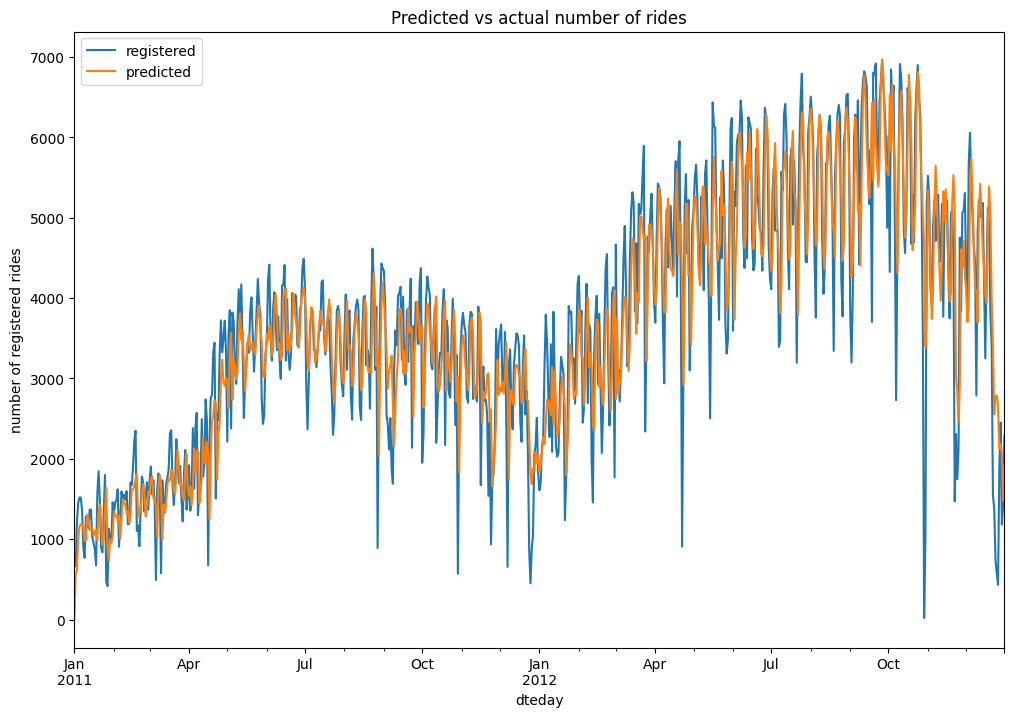

In [69]:
# plot original and predicted values
plot_data = pd.DataFrame(registered)
plot_data['predicted'] = model.predict_in_sample()
plot_data.plot(figsize=(12, 8))
plt.ylabel("number of registered rides")
plt.title("Predicted vs actual number of rides")

## Investigating the Impact of Weather Conditions on Rides

Define a Python function that accepts as input the hour data, a column name, and a weather condition, and then returns a seaborn regplot in which regression plots are produced between the provided column name and the registered and casual rides for the specified weather condition

In [81]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline
# load hourly data
data = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter01/data/hour.csv')

# create new column by encoding the weathersit one
weather_mapping = {1: 'clear', 2: 'cloudy',
                   3: 'light_rain_snow', 4: 'heavy_rain_snow'}
data['weather'] = data['weathersit'].apply(lambda x: weather_mapping[x])
data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt weather  
0           1  0.24  0.2879  0.81        0.0       3          13   16   clear  
1           1  0.22  0.2727  0.80        0.0       8          32   40   clear  
2           1  0.22  0.2727  0.80        0.0       5          27   32   clear  
3           1  0.24  0.2879  0.75        0.0       3          10   13   clear  
4           1  0.24  0.2879  0.75        0.0       0           1    1   clear

In [82]:
# define a function for creating a regression plot for a specified weather condition
def create_regression_plot(data, col, weather_cond):
    # extract data for the specific weather condition
    plot_data = data[data['weather'] == weather_cond]

    # create regplot for registered users
    ax = sns.regplot(x=col, y="registered", data=plot_data, scatter_kws={"alpha":0.05})

    # create regplot for casual users
    ax = sns.regplot(x=col, y="casual", data=plot_data, scatter_kws={"alpha":0.05})
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"{col} | {weather_cond}")
    return ax

Produce a 4 x 4 plot in which each column represents a specific weather
condition (clear, cloudy, light_rain_snow, and heavy_rain_snow), and each row of the specified four columns (temp, atemp, hum,and windspeed)

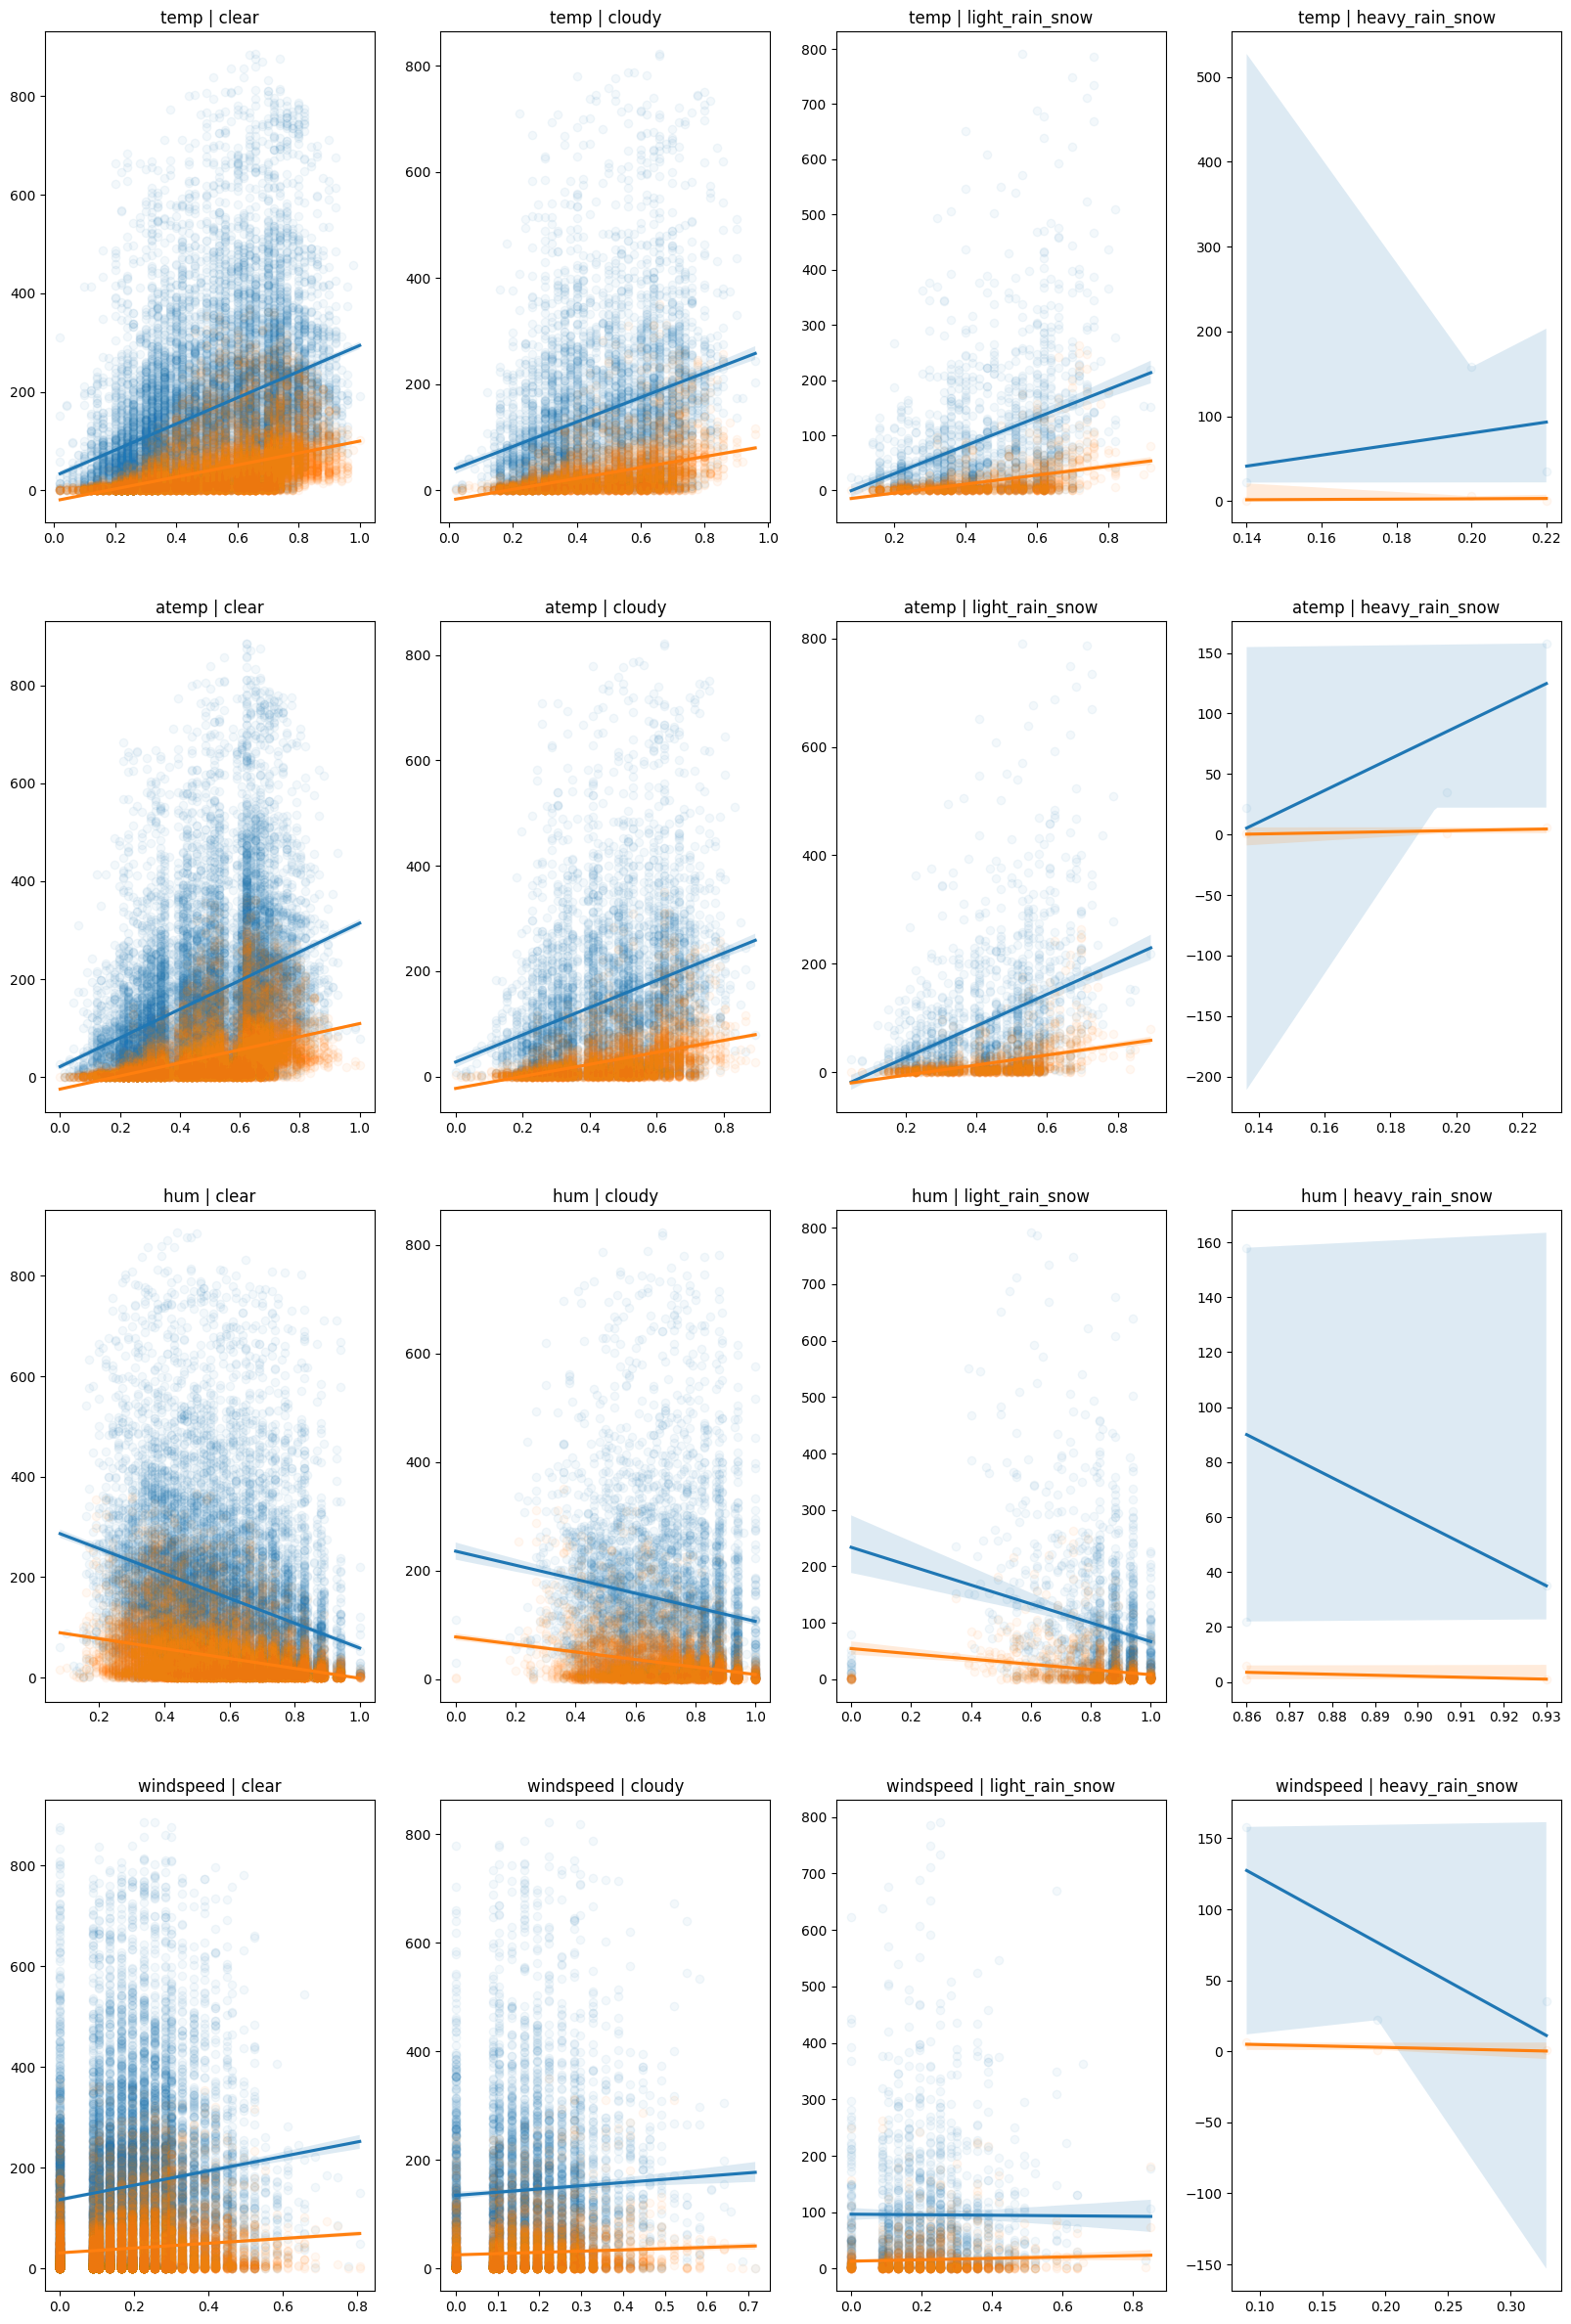

In [86]:
# create 4 by 4 regplots with columns and weather conditions
weather_conditions = data.weather.unique()
columns = ["temp", "atemp", "hum", "windspeed"]

plt.figure(figsize=(20,30))
for col_index, col in enumerate(columns):
    for row_index, weather_cond in enumerate(weather_conditions):
        plot_number = row_index + col_index*4 + 1
        plt.subplot(4,4,plot_number)
        create_regression_plot(data, col, weather_cond)

Define a second function that accepts as input the hour data, a column name, and a specific weather condition, and then prints the Pearson's correlation and p-value between the registered and casual rides and the provided column, for the specified weather condition (once correlation is computed between the registered rides and the specified column, and once between the casual rides and the specified column)

In [89]:
def print_correlation(data, col, weather_cond):
  corr_data = data[data['weather'] == weather_cond]
  pearson_corr_r = pearsonr(corr_data[col], corr_data['registered'])
  pearson_corr_c = pearsonr(corr_data[col], corr_data['casual'])

  print(f"Peason correlation (registered, {col}): corr={pearson_corr_r[0]:.03f}, p-value={pearson_corr_r[1]:.03f}")
  print(f"Peason correlation (casual, {col}): corr={pearson_corr_c[0]:.03f}, p-value={pearson_corr_c[1]:.03f}")

Iterating over the four columns (temp, atemp, hum, and windspeed) and four weather conditions (clear, cloudy, light_rain_snow, and heavy_rain_ snow), print the correlation for each column and each weather condition

In [90]:
weather_conditions = data.weather.unique()
columns = ["temp", "atemp", "hum", "windspeed"]

for weather_cond in weather_conditions:
  for col in columns:
    print_correlation(data, col, weather_cond)

Peason correlation (registered, temp): corr=0.340, p-value=0.000
Peason correlation (casual, temp): corr=0.459, p-value=0.000
Peason correlation (registered, atemp): corr=0.334, p-value=0.000
Peason correlation (casual, atemp): corr=0.451, p-value=0.000
Peason correlation (registered, hum): corr=-0.282, p-value=0.000
Peason correlation (casual, hum): corr=-0.331, p-value=0.000
Peason correlation (registered, windspeed): corr=0.113, p-value=0.000
Peason correlation (casual, windspeed): corr=0.111, p-value=0.000
Peason correlation (registered, temp): corr=0.285, p-value=0.000
Peason correlation (casual, temp): corr=0.437, p-value=0.000
Peason correlation (registered, atemp): corr=0.285, p-value=0.000
Peason correlation (casual, atemp): corr=0.434, p-value=0.000
Peason correlation (registered, hum): corr=-0.156, p-value=0.000
Peason correlation (casual, hum): corr=-0.289, p-value=0.000
Peason correlation (registered, windspeed): corr=0.048, p-value=0.001
Peason correlation (casual, windsp